<a href="https://colab.research.google.com/github/DragonKishi/DampedOscillatorSimulation/blob/main/DampedOscCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT STATEMENTS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Parameters for a single pendulum

In [ ]:
m = 1.0           # kg
L = 1.0           # m
g = 9.81          # m/s^2
b = 0.5           # damping coefficient (N·m·s)
A = 2.0           # driving torque amplitude (N·m)
Omega = 1.5       # driving frequency (rad/s)


Damped Driven Pendulum ODE

In [ ]:
def damped_driven_pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta) - (b / (m * L**2)) * omega + (A / (m * L**2)) * np.cos(Omega * t)
    return [dtheta_dt, domega_dt]

Simulation for one pendulum

In [ ]:
initial_conditions = [0.1, 0.0]  # theta(0), omega(0)
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 2000)
sol_single = solve_ivp(damped_driven_pendulum, t_span, initial_conditions, t_eval=t_eval, max_step=0.01)

Plot for one pendulum

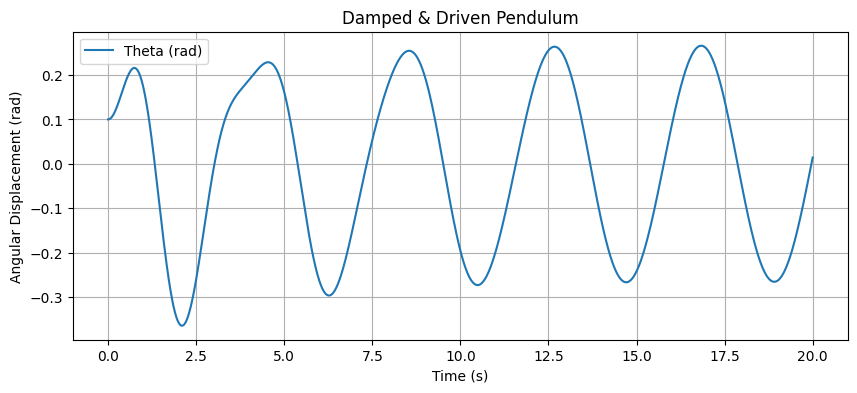

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(sol_single.t, sol_single.y[0], label='Theta (rad)')
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (rad)')
plt.title('Damped & Driven Pendulum')
plt.grid(True)
plt.legend()
plt.show()

Parameters for coupled pendulum

In [ ]:
m1 = m2 = 1.0
L1 = L2 = 1.0
b1 = b2 = 0.2
k_spring = 2.0

Coupled Pendulum ODE

In [ ]:
def coupled_pendulums(t, y):
    theta1, omega1, theta2, omega2 = y
    dtheta1_dt = omega1
    dtheta2_dt = omega2
    domega1_dt = -(g/L1)*theta1 - (b1/(m1*L1**2))*omega1 - (k_spring/m1)*(theta1 - theta2)
    domega2_dt = -(g/L2)*theta2 - (b2/(m2*L2**2))*omega2 - (k_spring/m2)*(theta2 - theta1)
    return [dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt]

Simulation for coupled pendulum

In [ ]:
y0_coupled = [0.2, 0.0, 0.0, 0.0]
t_eval_coupled = np.linspace(0, 30, 3000)
sol_coupled = solve_ivp(coupled_pendulums, [0, 30], y0_coupled, t_eval=t_eval_coupled, max_step=0.01)


Plot for coupled Pendulum

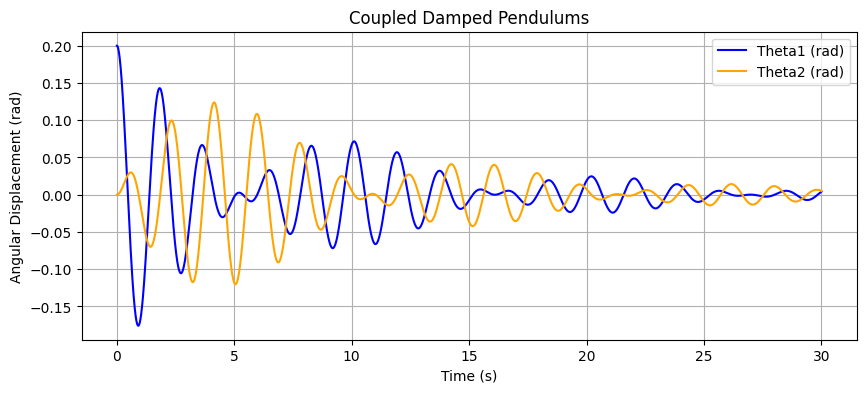

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(sol_coupled.t, sol_coupled.y[0], label='Theta1 (rad)', color='blue')
plt.plot(sol_coupled.t, sol_coupled.y[2], label='Theta2 (rad)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (rad)')
plt.title('Coupled Damped Pendulums')
plt.legend()
plt.grid(True)
plt.show()

Energy Analysis for one pendulum

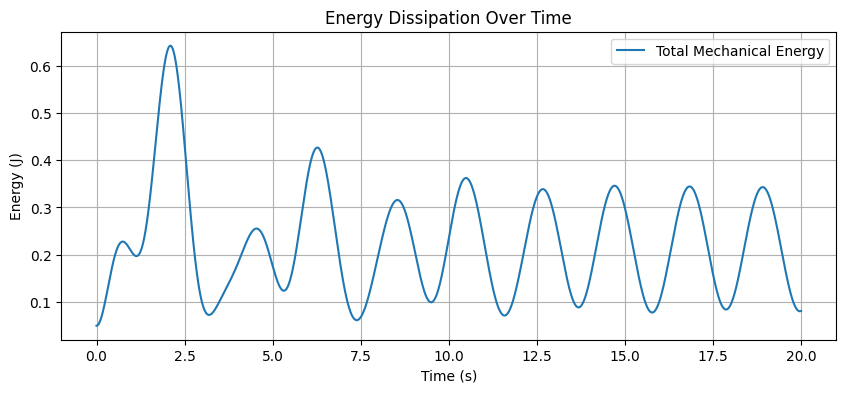

In [ ]:
energy = 0.5 * m * (L**2) * sol_single.y[1]**2 + m * g * L * (1 - np.cos(sol_single.y[0]))
plt.figure(figsize=(10, 4))
plt.plot(sol_single.t, energy, label='Total Mechanical Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy Dissipation Over Time')
plt.grid(True)
plt.legend()
plt.show()


Energy Analysis for coupled Pendulums

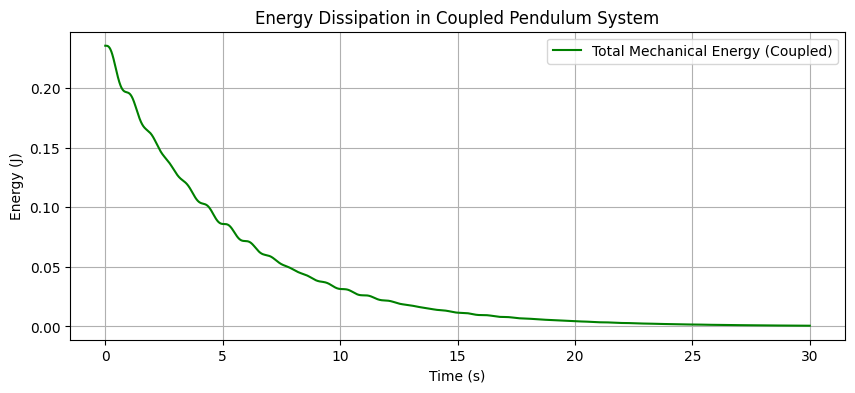

In [ ]:
T1 = 0.5 * m1 * (L1**2) * sol_coupled.y[1]**2
V1 = m1 * g * L1 * (1 - np.cos(sol_coupled.y[0]))

T2 = 0.5 * m2 * (L2**2) * sol_coupled.y[3]**2
V2 = m2 * g * L2 * (1 - np.cos(sol_coupled.y[2]))

V_spring = 0.5 * k_spring * (sol_coupled.y[0] - sol_coupled.y[2])**2

E_total = T1 + V1 + T2 + V2 + V_spring

plt.figure(figsize=(10, 4))
plt.plot(sol_coupled.t, E_total, label='Total Mechanical Energy (Coupled)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy Dissipation in Coupled Pendulum System')
plt.grid(True)
plt.legend()
plt.show()

Theta 1 Frequency

In [ ]:
from scipy.signal import find_peaks

peaks1, _ = find_peaks(sol_coupled.y[0], height=0.05)
peak_times = sol_coupled.t[peaks1]
peak_intervals = np.diff(peak_times)
avg_period = np.mean(peak_intervals)
normal_mode_freq = 1 / avg_period
print(f"Estimated frequency from Theta1: {normal_mode_freq:.3f} Hz")

Estimated frequency from Theta1: 0.396 Hz


Theta 2 Frequency

In [ ]:
peaks2, _ = find_peaks(sol_coupled.y[2], height=0.05)
peak_times2 = sol_coupled.t[peaks2]
peak_intervals2 = np.diff(peak_times2)
avg_period2 = np.mean(peak_intervals2)
freq2 = 1 / avg_period2
print(f"Estimated frequency from Theta2: {freq2:.3f} Hz")

Estimated frequency from Theta2: 0.549 Hz


Normal Modes Analysis

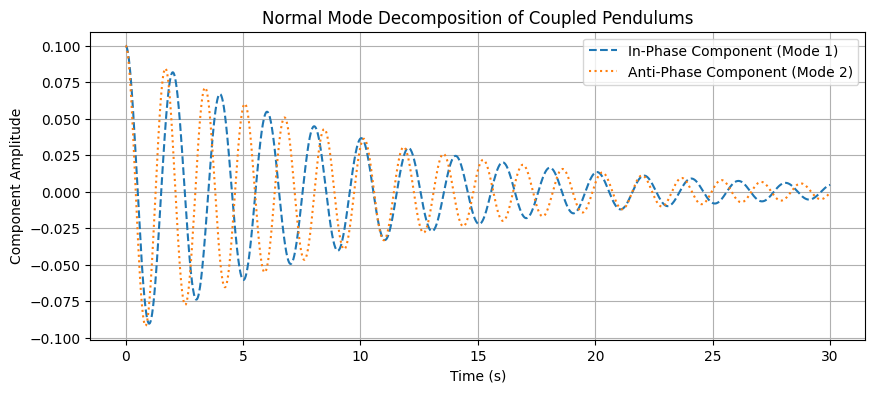

In [ ]:
mode_sum = (sol_coupled.y[0] + sol_coupled.y[2]) / 2
mode_diff = (sol_coupled.y[0] - sol_coupled.y[2]) / 2

plt.figure(figsize=(10, 4))
plt.plot(sol_coupled.t, mode_sum, label='In-Phase Component (Mode 1)', linestyle='--')
plt.plot(sol_coupled.t, mode_diff, label='Anti-Phase Component (Mode 2)', linestyle=':')
plt.xlabel('Time (s)')
plt.ylabel('Component Amplitude')
plt.title('Normal Mode Decomposition of Coupled Pendulums')
plt.grid(True)
plt.legend()
plt.show()


Visualisation of Normal Modes

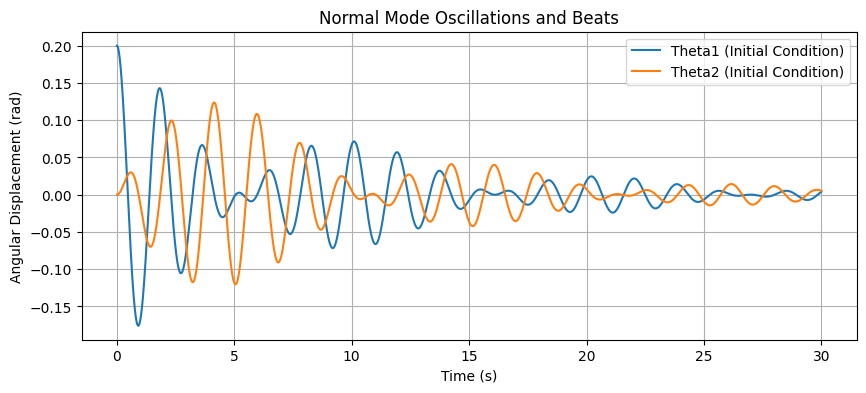

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(sol_coupled.t, sol_coupled.y[0], label='Theta1 (Initial Condition)')
plt.plot(sol_coupled.t, sol_coupled.y[2], label='Theta2 (Initial Condition)')
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (rad)')
plt.title('Normal Mode Oscillations and Beats')
plt.grid(True)
plt.legend()
plt.show()

Resonance Visualisation Single pendulum

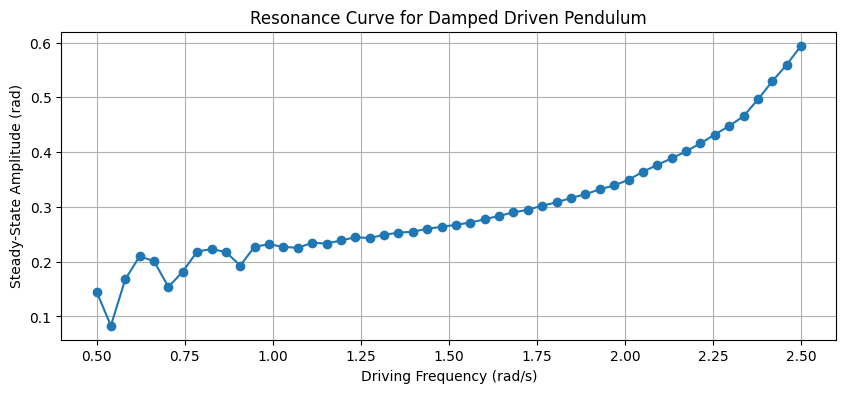

In [ ]:
frequencies = np.linspace(0.5, 2.5, 50)
amplitudes = []

for omega in frequencies:
    def forced_pendulum(t, y):
        theta, omega_val = y
        dtheta_dt = omega_val
        domega_dt = -(g / L) * np.sin(theta) - (b / (m * L**2)) * omega_val + (A / (m * L**2)) * np.cos(omega * t)
        return [dtheta_dt, domega_dt]

    sol = solve_ivp(forced_pendulum, [0, 20], [0.0, 0.0], t_eval=np.linspace(0, 20, 2000))
    steady_state_theta = sol.y[0][-500:]
    amplitude = (np.max(steady_state_theta) - np.min(steady_state_theta)) / 2
    amplitudes.append(amplitude)

plt.figure(figsize=(10, 4))
plt.plot(frequencies, amplitudes, marker='o')
plt.xlabel('Driving Frequency (rad/s)')
plt.ylabel('Steady-State Amplitude (rad)')
plt.title('Resonance Curve for Damped Driven Pendulum')
plt.grid(True)
plt.show()

Resonance Visualisation for Coupled Oscillators

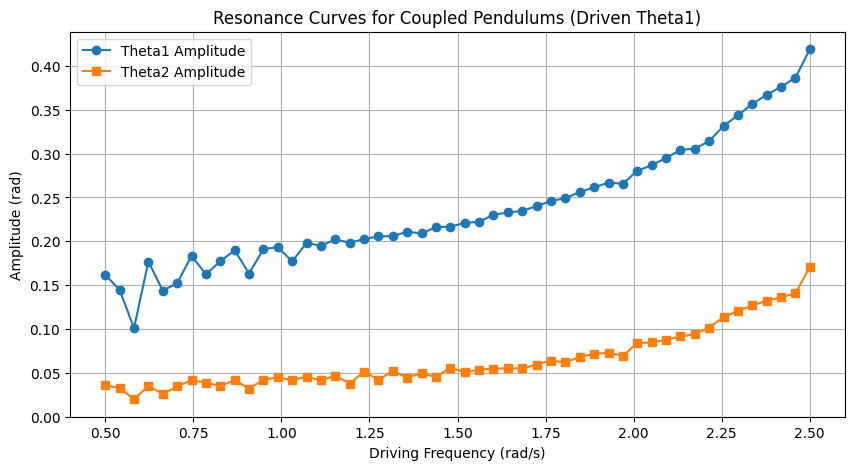

In [ ]:
frequencies_coupled = np.linspace(0.5, 2.5, 50)
amplitudes_theta1 = []
amplitudes_theta2 = []

for omega in frequencies_coupled:
    def forced_coupled_pendulums(t, y):
        theta1, omega1, theta2, omega2 = y
        dtheta1_dt = omega1
        dtheta2_dt = omega2
        domega1_dt = -(g/L1)*theta1 - (b1/(m1*L1**2))*omega1 - (k_spring/m1)*(theta1 - theta2) + (A/(m1*L1**2)) * np.cos(omega * t)
        domega2_dt = -(g/L2)*theta2 - (b2/(m2*L2**2))*omega2 - (k_spring/m2)*(theta2 - theta1)
        return [dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt]

    sol_res = solve_ivp(forced_coupled_pendulums, [0, 30], [0.0, 0.0, 0.0, 0.0], t_eval=np.linspace(0, 30, 3000))
    steady_theta1 = sol_res.y[0][-500:]
    steady_theta2 = sol_res.y[2][-500:]
    amp1 = (np.max(steady_theta1) - np.min(steady_theta1)) / 2
    amp2 = (np.max(steady_theta2) - np.min(steady_theta2)) / 2
    amplitudes_theta1.append(amp1)
    amplitudes_theta2.append(amp2)

plt.figure(figsize=(10, 5))
plt.plot(frequencies_coupled, amplitudes_theta1, label='Theta1 Amplitude', marker='o')
plt.plot(frequencies_coupled, amplitudes_theta2, label='Theta2 Amplitude', marker='s')
plt.xlabel('Driving Frequency (rad/s)')
plt.ylabel('Amplitude (rad)')
plt.title('Resonance Curves for Coupled Pendulums (Driven Theta1)')
plt.grid(True)
plt.legend()
plt.show()